In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the training data
data = pd.read_csv('./train.csv', encoding = 'big5')
data

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984
...,...,...
695,93,94.625094
696,82,88.603770
697,66,63.648685
698,97,94.975266


In [2]:
raw_data = data.to_numpy()

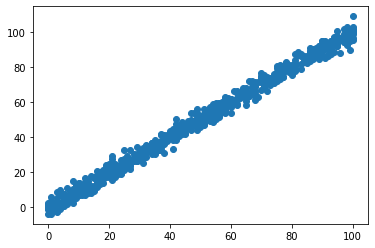

In [3]:
xAxis = []
yAxis = []

#draw the scatter graph
for i in range(700):
    xAxis.append(raw_data[i, 0])
    yAxis.append(raw_data[i, 1])
plt.scatter(xAxis, yAxis)

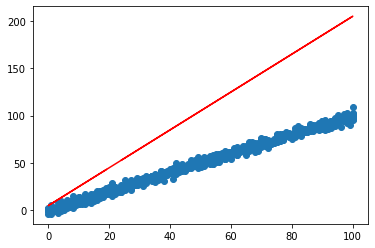

In [4]:
"""
Define the function: y = b + w * x
However, we know the values of x and y, so now we must initialize the parameters of the variables w and b
"""

#Initialize the values of w and b
w = 2
b = 5
y = []

#Draw a line on the graph
for i in range(700):
    y.append(b + w * xAxis[i])
plt.scatter(xAxis, yAxis)
plt.plot(xAxis, y, 'r')

In [5]:
"""
Define the loss function: L(w, b) = Σ(ŷ - (b + w * x))²
"""

#Calculate the value of loss
loss = 0
for i in range(700):
    loss += np.power((yAxis[i] - (b + w * xAxis[i])), 2)
loss

2711632.3667796645

In [6]:
#∂L/∂w
def dw(x, y, w, b):
    res = 2 * (y - (b + w * x)) * (-x)
    #print(res)
    return res

#∂L/∂b
def db(x, y, w, b):
    res = 2 * (y - (b + w * x))
    #print(res)
    return res

#Using the Gradient Descent to find and train the values of w and b
learningRate = 0.0001
for i in range(700):
    w = w - learningRate * dw(xAxis[i], yAxis[i], w, b)
    b = b - learningRate * db(xAxis[i], yAxis[i], w, b)
print(w, " ", b)

0.9418309531695699   5.257317337100042


In [7]:
#Asign the values of w and b after Gradient Descent then calculate the value of loss again
w = 0.9418309531695699
b = 5.25731733710004
y = []
for i in range(700):
    y.append(b + w * xAxis[i])

loss = 0
for i in range(700):
    loss += np.power((yAxis[i] - (b + w * xAxis[i])), 2)
loss

11626.843515510227

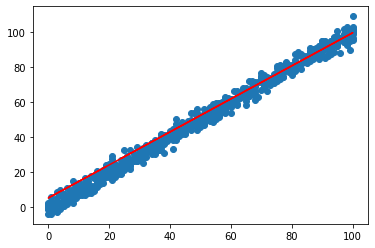

In [8]:
#The result of training set
plt.scatter(xAxis, yAxis)
plt.plot(xAxis, y, 'r')

In [9]:
#Load the testing data
testData = pd.read_csv('./test.csv', encoding = 'big5')
testData

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


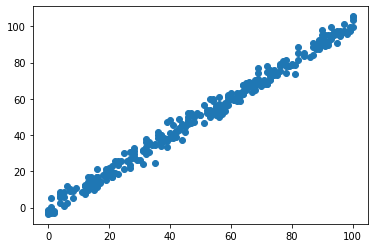

In [10]:
raw_testData = testData.to_numpy()
xxAxis = []
yyAxis = []
for i in range(300):
    xxAxis.append(raw_testData[i, 0])
    yyAxis.append(raw_testData[i, 1])
plt.scatter(xxAxis, yyAxis)

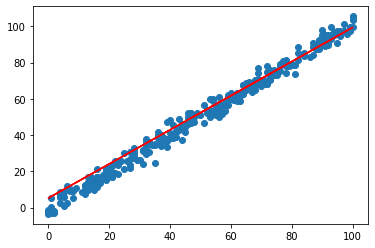

In [11]:
yy = []
for i in range(300):
    yy.append(b + w * xxAxis[i])
plt.scatter(xxAxis, yyAxis)
plt.plot(xxAxis, yy, 'r')